In [1]:
import numpy as np
import scipy
import helper_utils

In [2]:
helper_utils.list_available_tracks()

['reInvent2019_track', '2022_august_open', 'Canada_Training', 'canada_race', 'Tokyo_Training_track', 'Oval_track', 'thunder_hill_pro_cw', 'New_York_Track', 'Bowtie_track', 'H_track', 'reinvent_base', '2022_september_open', 'Mexico_track', 'Virtual_May19_Train_track', 'Straight_track', 'AWS_track', 'China_track', '2022_july_open', '2022_june_open', 'London_Loop_Train']


In [3]:
TRACK_NAME = "thunder_hill_pro_cw"
center_line, inner_border, outer_border = helper_utils.load_track_waypoints(TRACK_NAME)

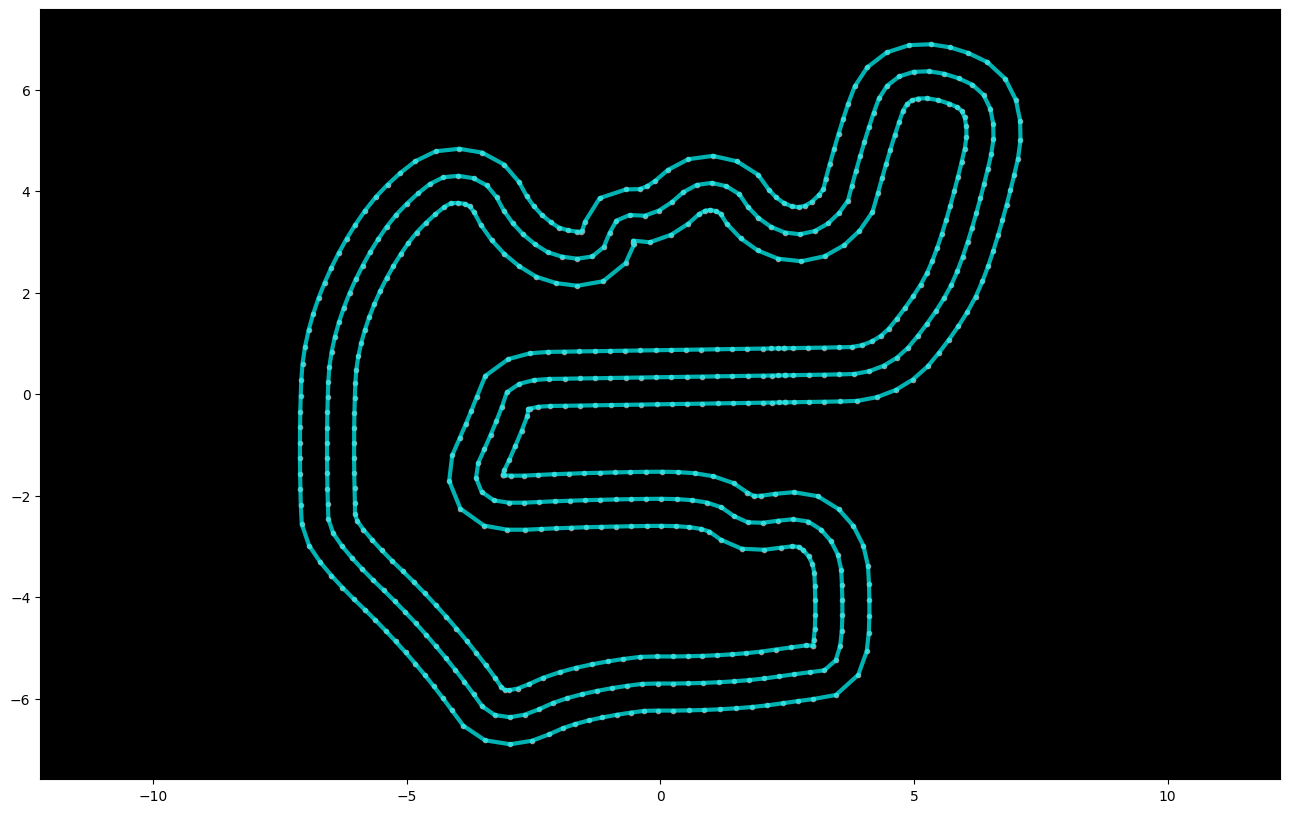

In [4]:
helper_utils.plot_track(center_line, inner_border, outer_border)

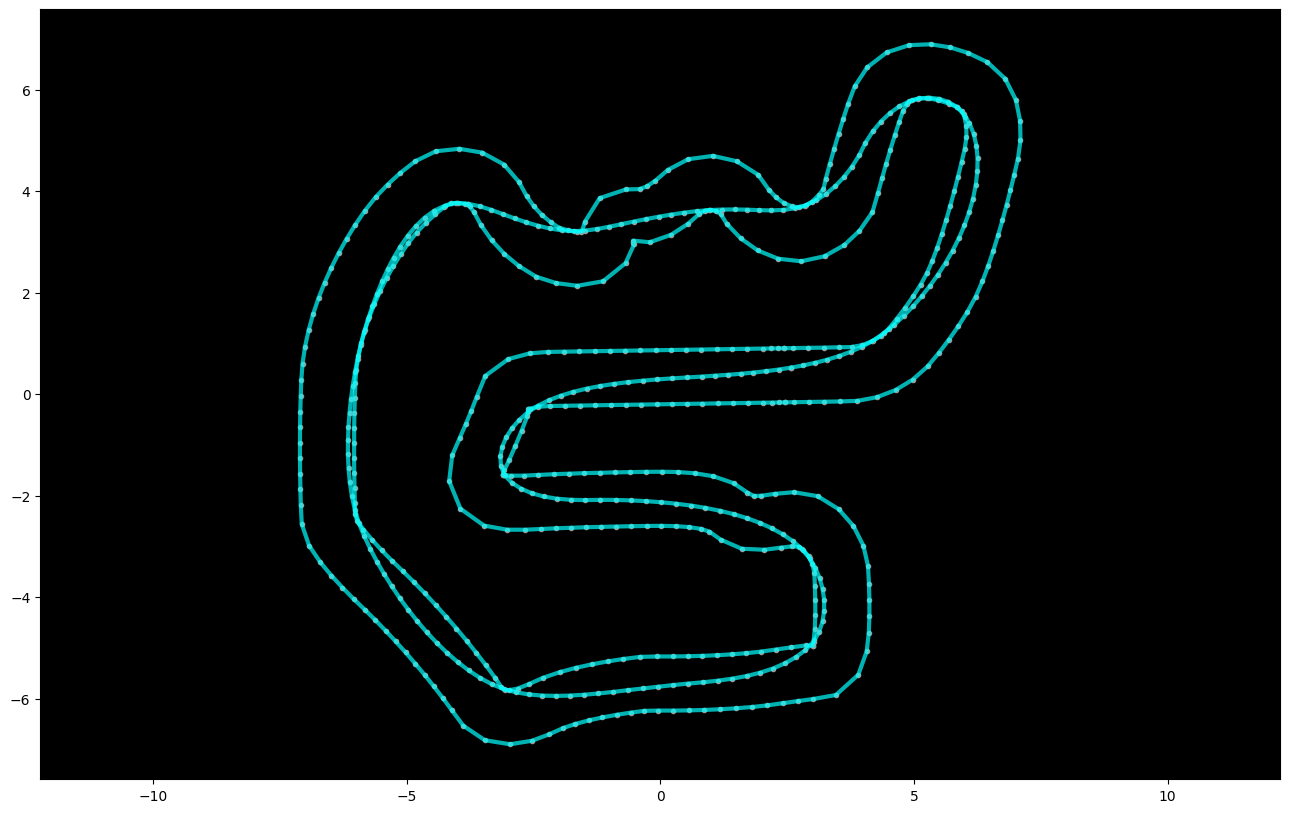

In [5]:
racing_line = helper_utils.load_py_to_ndarray('./racelines/thunder_hill_pro_cw-2000-4-1.00-2023-06-19-172405.py')
helper_utils.plot_track(racing_line, inner_border, outer_border)

In [6]:
FILL = 5.47
npoints = len(racing_line)
cubic_spline = scipy.interpolate.CubicSpline(np.arange(npoints), racing_line)
racing_line_populated = cubic_spline(np.linspace(0, npoints - 1, int((npoints - 1) * FILL)))

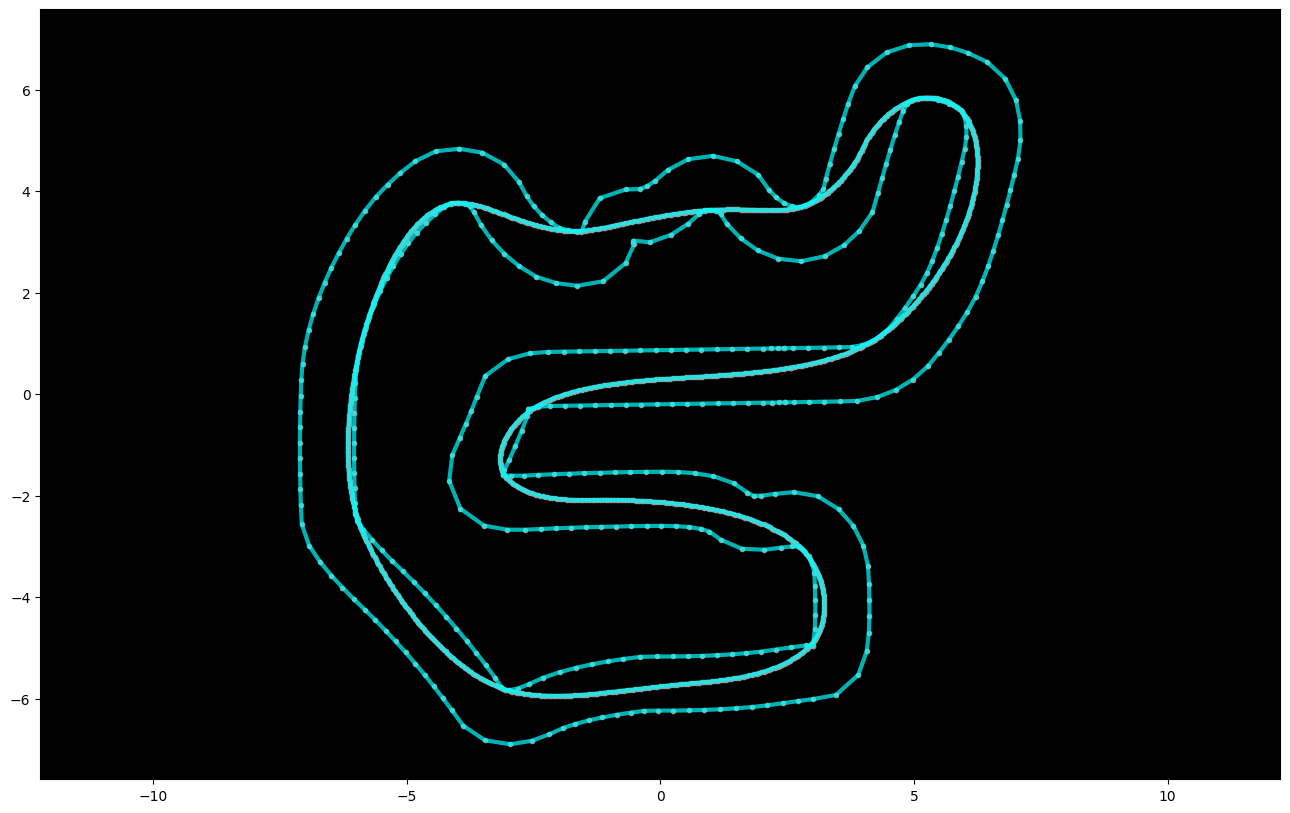

In [7]:
helper_utils.plot_track(racing_line_populated, inner_border, outer_border)

[-5.71886436  1.60562603]
[1.89804634 0.43196796]


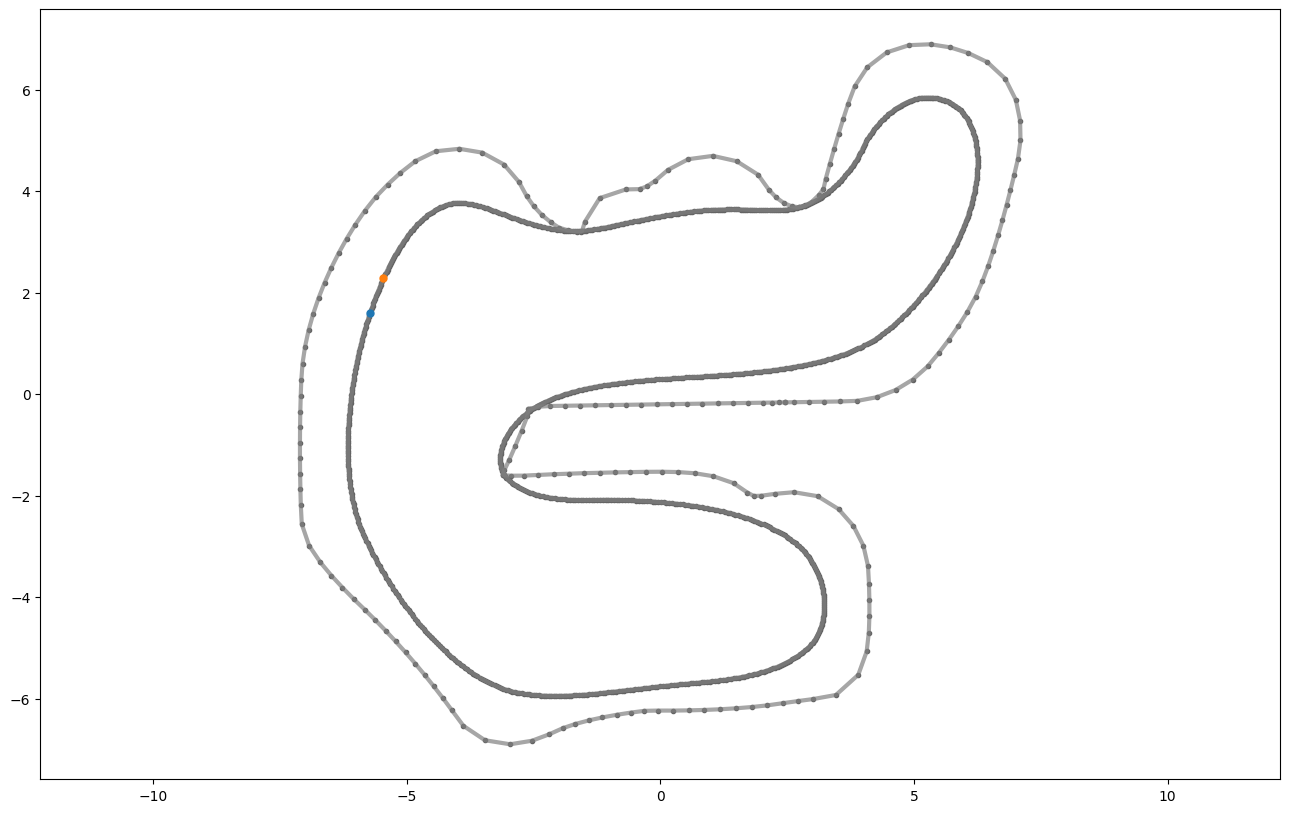

In [8]:
fig = helper_utils.plot_border(racing_line_populated, outer_border)

pt = 620
st = 15
fig.gca().plot(racing_line_populated[pt, 0], racing_line_populated[pt, 1], marker="o", markersize=5, zorder=6)
fig.gca().plot(racing_line_populated[pt+st, 0], racing_line_populated[pt+st, 1], marker="o", markersize=5, zorder=6)

print(racing_line_populated[pt])
print(racing_line_populated[st])

In [9]:
len(racing_line_populated)

1088

In [10]:
from datetime import datetime

now = datetime.now()
prefix = './racelines-populated/%s-cubspl-%.2f-%s' % (TRACK_NAME, FILL, now.strftime('%Y-%m-%d-%H%M%S'))
arr_repr = helper_utils.array2D_repr_columns(racing_line_populated, 5)
helper_utils.export_ndarray(racing_line_populated, prefix, arr_repr)

Writing python code to ./racelines-populated/thunder_hill_pro_cw-cubspl-5.47-2023-06-19-172719.py
Writing numpy binary to ./racelines-populated/thunder_hill_pro_cw-cubspl-5.47-2023-06-19-172719.npy
